In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive .mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/dengue.csv")
data.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [4]:
# Data Exploration
print(data.head())
print(data.info())
print(data.describe())

   Gender  Age  NS1  IgG  IgM        Area     AreaType HouseType District  \
0  Female   45    0    0    0      Mirpur  Undeveloped  Building    Dhaka   
1    Male   17    0    0    1  Chawkbazar    Developed  Building    Dhaka   
2  Female   29    0    0    0      Paltan  Undeveloped     Other    Dhaka   
3  Female   63    1    1    0   Motijheel    Developed     Other    Dhaka   
4    Male   22    0    0    0    Gendaria  Undeveloped  Building    Dhaka   

   Outcome  
0        0  
1        0  
2        0  
3        1  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7

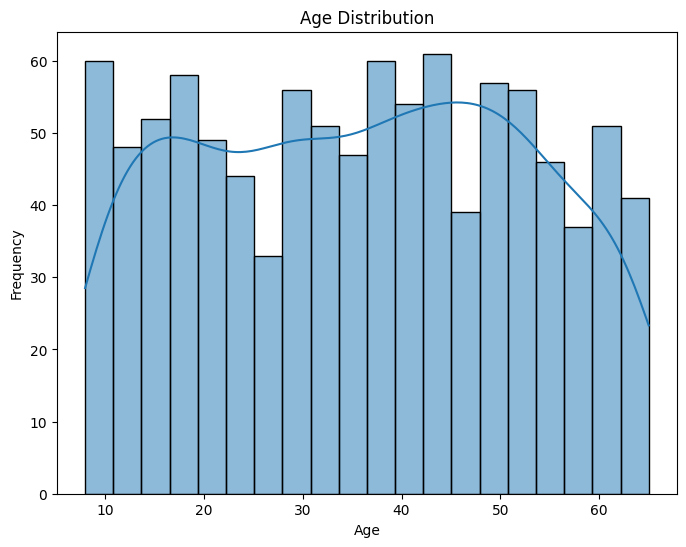

In [5]:
# Replace infinite values with NaN in a way that doesn't trigger chained assignment warning
data.loc[:, 'Age'] = data['Age'].replace([np.inf, -np.inf], np.nan)

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

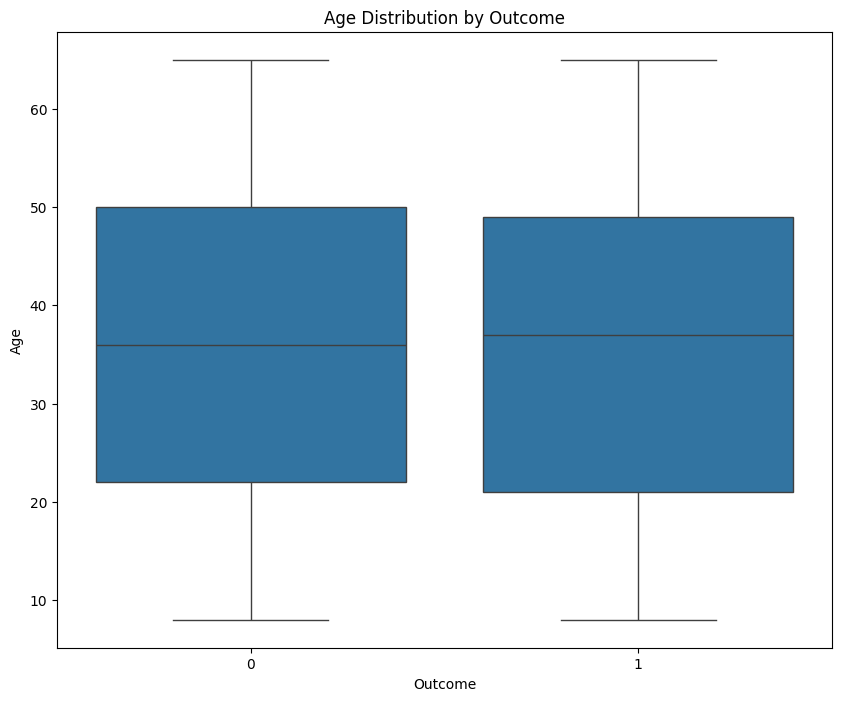

In [6]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Outcome', y='Age', data=data)
plt.title('Age Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()

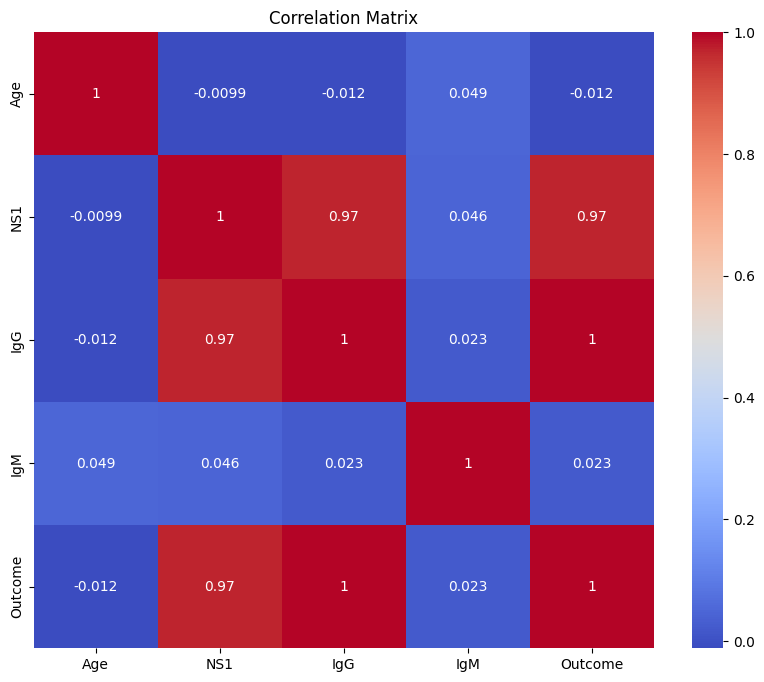

In [7]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=np.number)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Area'] = label_encoder.fit_transform(data['Area'])
data['AreaType'] = label_encoder.fit_transform(data['AreaType'])
data['HouseType'] = label_encoder.fit_transform(data['HouseType'])

In [9]:
data.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,0,45,0,0,0,22,1,0,Dhaka,0
1,1,17,0,0,1,7,0,0,Dhaka,0
2,0,29,0,0,0,27,1,1,Dhaka,0
3,0,63,1,1,0,24,0,1,Dhaka,1
4,1,22,0,0,0,10,1,0,Dhaka,0


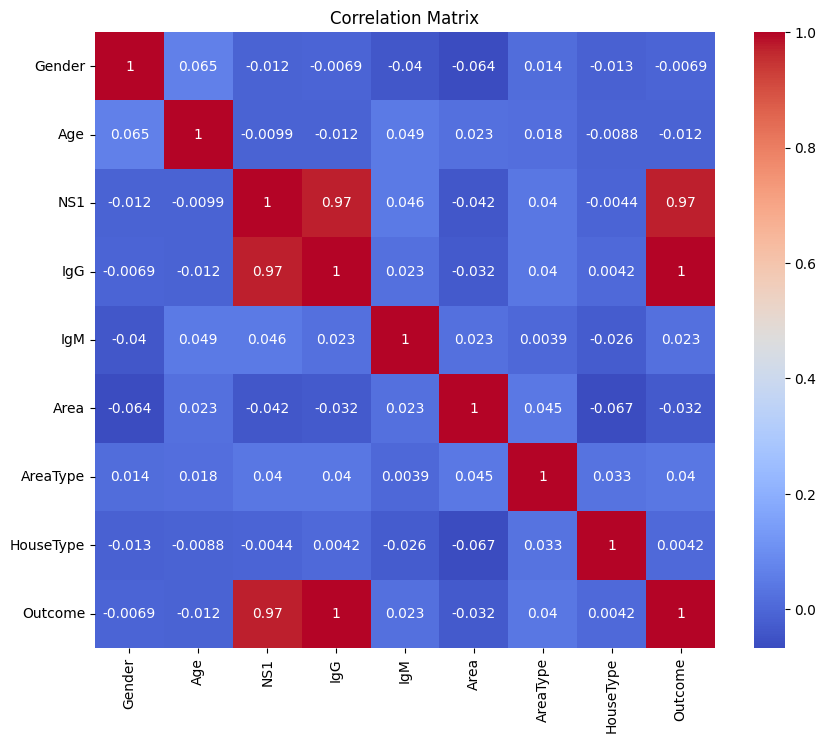

In [11]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=np.number)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

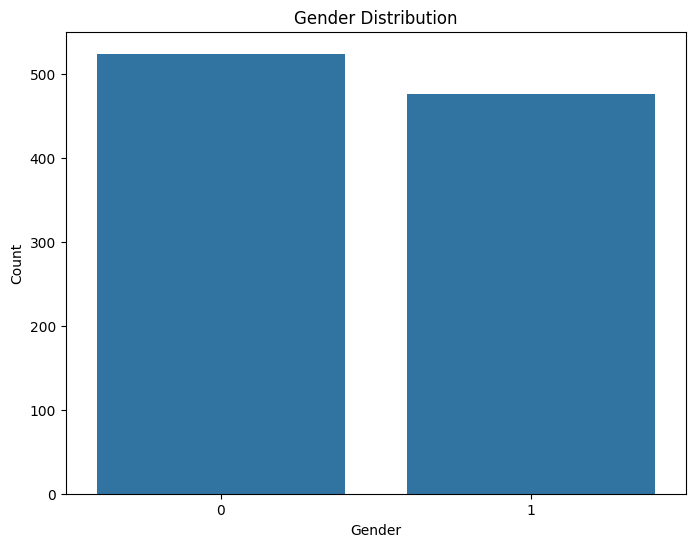

In [12]:
# Data Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [13]:
# Define features and target
X = data[['Gender','Area', 'AreaType', 'HouseType', 'NS1', 'IgG', 'IgM']]
y = data['Outcome']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=90, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90, random_state=42)

In [17]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

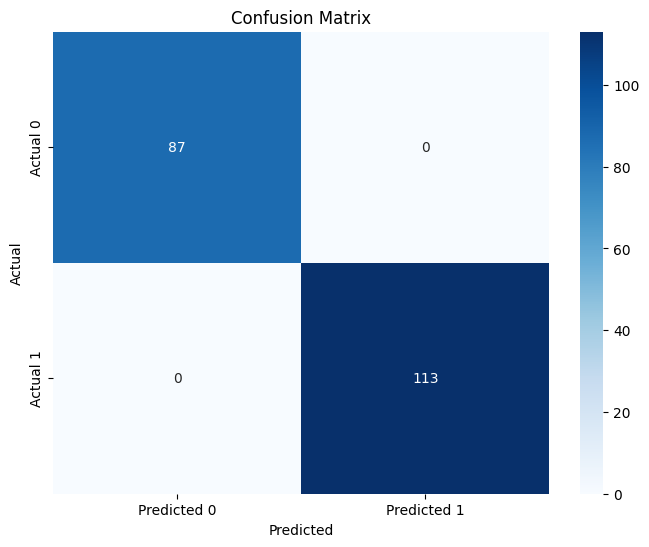

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [23]:
# Calculate the recall score
recall = recall_score(y_test, y_pred)
y_true=y_test

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [24]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset
from sklearn.metrics import accuracy_score


# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=90, random_state=42)
rf_clf.fit(X_train, y_train)



RandomForestClassifier(n_estimators=90, random_state=42)

In [25]:
import pandas as pd

# Example dataframe (replace with your actual dataframe)
data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male'],
    'Area': ['Urban', 'Rural', 'Urban', 'Rural'],
    'AreaType': ['Type1', 'Type2', 'Type1', 'Type2'],
    'HouseType': ['Apartment', 'House', 'House', 'Apartment']
})

# Convert categorical variables to numerical using One-Hot Encoding
data = pd.get_dummies(data, columns=['Gender', 'Area', 'AreaType', 'HouseType'])

print(data)


   Gender_Female  Gender_Male  Area_Rural  Area_Urban  AreaType_Type1  \
0          False         True       False        True            True   
1           True        False        True       False           False   
2           True        False       False        True            True   
3          False         True        True       False           False   

   AreaType_Type2  HouseType_Apartment  HouseType_House  
0           False                 True            False  
1            True                False             True  
2           False                False             True  
3            True                 True            False  


In [26]:
# Train the SVM classifier
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [27]:

# Train the SVM classifier
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Example dataset
from sklearn.metrics import accuracy_score


# Evaluate the accuracy of the SVM classifier
svm_y_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM classifier accuracy: {svm_accuracy:.2f}')


SVM classifier accuracy: 1.00


In [29]:

# Combine both classifiers using VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('svm', svm_clf)],
    voting='soft'  # 'soft' voting uses predicted probabilities, 'hard' voting uses predicted class labels
)


In [32]:

# Train the ensemble classifier
model=ensemble_clf.fit(X_train, y_train)


In [33]:
model

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=90,
                                                     random_state=42)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [31]:
# Make predictions
y_pred = ensemble_clf.predict(X_test)


**SHAP values**

In [56]:
data.head()

,Gender_Female,Gender_Male,Area_Rural,Area_Urban,AreaType_Type1,AreaType_Type2,HouseType_Apartment,HouseType_House
0,False,True,False,True,True,False,True,False
1,True,False,True,False,False,True,False,True
2,True,False,False,True,True,False,False,True
3,False,True,True,False,False,True,True,False


In [44]:
from sklearn.ensemble import VotingClassifier
import joblib

In [45]:
# Assuming `model` is your VotingClassifier instance
joblib.dump(model, "ensemble_model.pkl")

['ensemble_model.pkl']

In [46]:
# Load the ensemble model
loaded_model = joblib.load("ensemble_model.pkl")


ExactExplainer explainer: 201it [00:16,  9.26it/s]                         


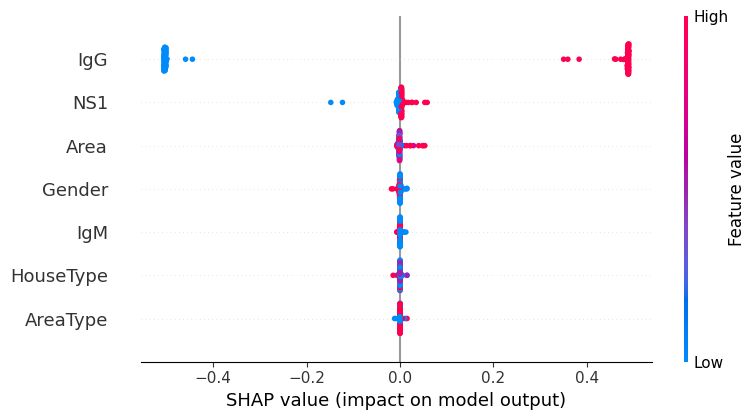

In [48]:
import shap

# Select a base model from the ensemble (e.g., the first model)
base_model = loaded_model.estimators_[0]  # Change index if needed

# Create SHAP explainer for the base model
explainer = shap.Explainer(base_model.predict, X_test)  # Use predict_proba for classifiers

# Compute SHAP values
shap_values = explainer(X_test)

# Initialize the SHAP JavaScript library
shap.initjs()

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)


Explaining model: rf


ExactExplainer explainer: 201it [00:15,  7.61it/s]                         


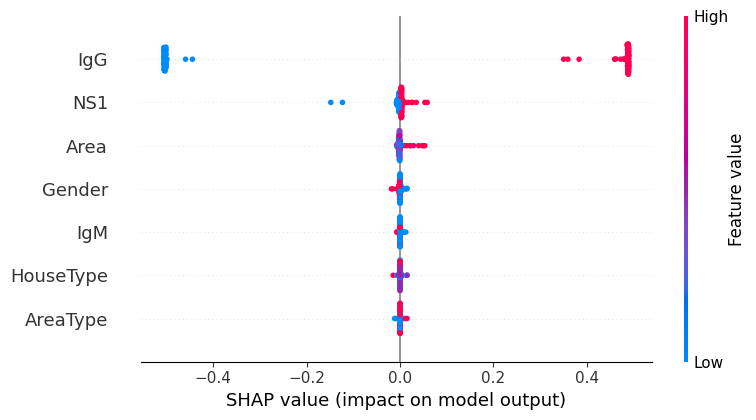

Explaining model: svm


ExactExplainer explainer: 201it [00:57,  2.85it/s]


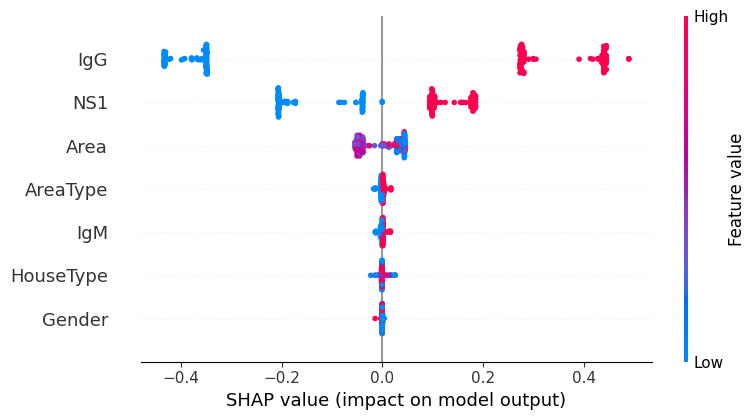

In [50]:
for name, model in loaded_model.estimators:  # Remove the trailing underscore from 'estimators_'
    print(f"Explaining model: {name}")
    explainer = shap.Explainer(model.predict, X_test)  # Use predict_proba for classifiers
    shap_values = explainer(X_test)
    shap.summary_plot(shap_values, X_test)


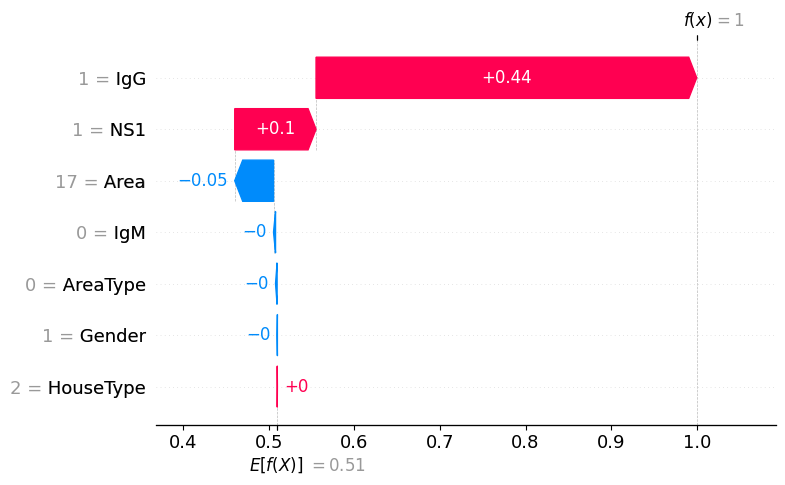

In [51]:
# Display SHAP waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

  0%|          | 0/200 [00:00<?, ?it/s]

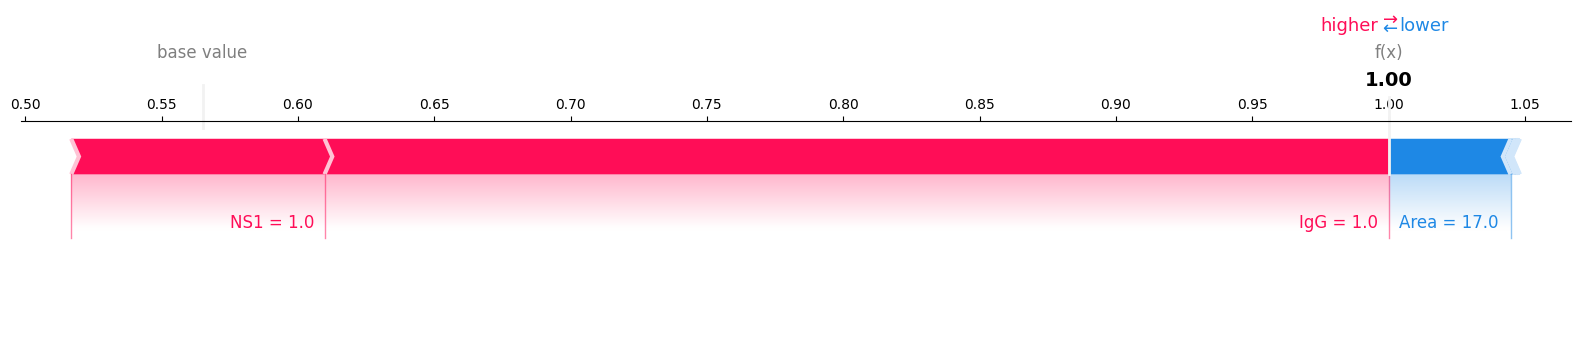

In [54]:
# Create a SHAP explainer for the model forced plot
# explainer = shap.Explainer(model) # The original line caused the error
# explainer = shap.Explainer(model.predict, X_test)  # Pass the predict method of the model # This was also incorrect
explainer = shap.KernelExplainer(model.predict, X_test) # Use KernelExplainer instead

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test) # Access shap_values method

# If SHAP values are an Explanation object, extract the values
# if isinstance(shap_values, shap.Explanation): # This is not needed anymore
#     shap_values = shap_values.values

# Force plot for the first observation with matplotlib
# The expected_value is the model's expected output for the dataset
# The shap_values[0] represents the SHAP values for the first observation
# X_test.iloc[0, :] is the corresponding feature values for the first observation
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :], matplotlib=True)

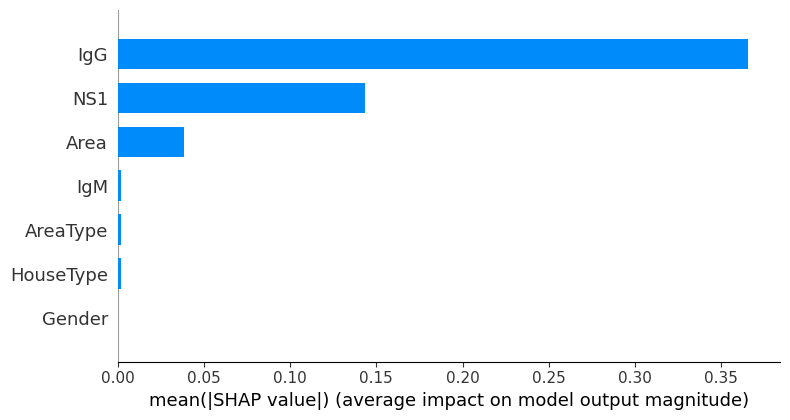

In [55]:
# Generate and display SHAP summary plot as a bar chart
shap.summary_plot(shap_values, X_test, plot_type="bar")

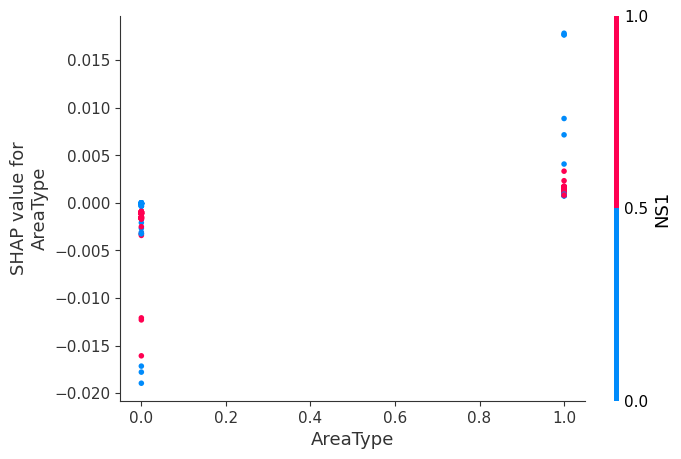

In [58]:
# Generate SHAP dependence plot for the "ShellWeight" feature
shap.dependence_plot("AreaType", shap_values, X_test)

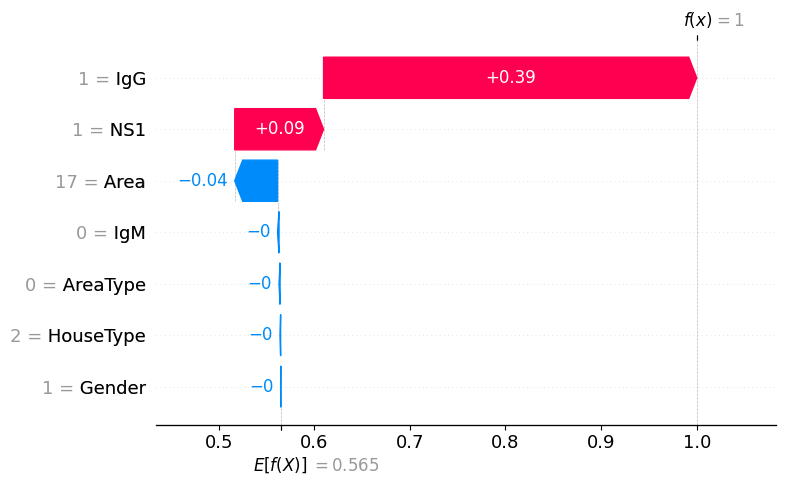

In [60]:
# Display SHAP waterfall plot for the first observation
# shap.waterfall_plot(shap_values[0]) # This was causing the error
shap.waterfall_plot(shap.Explanation(values=shap_values[0],
                                     base_values=explainer.expected_value,
                                     data=X_test.iloc[0].values,
                                     feature_names=X_test.columns))

# Relation Based Discussion

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/dengue.csv')

In [ ]:
df.shape

(1000, 10)

In [ ]:
df.isnull()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_counts = df.isnull().sum()
print("Number of Null Values in Each Column:")
print(null_counts)

Number of Null Values in Each Column:
Gender       0
Age          0
NS1          0
IgG          0
IgM          0
Area         0
AreaType     0
HouseType    0
District     0
Outcome      0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

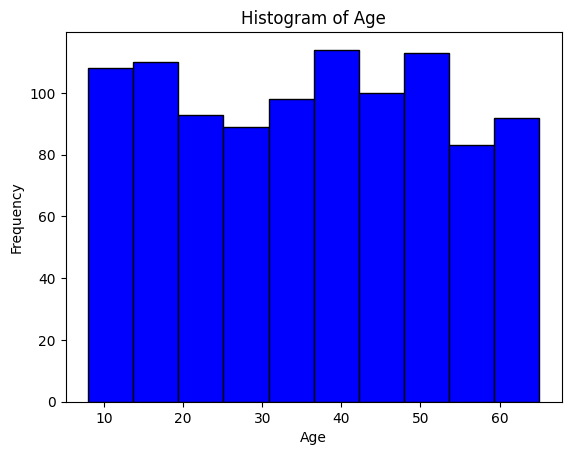

In [ ]:
plt.hist(df['Age'], bins=10, color='blue', edgecolor='black')

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [ ]:
unique_values_area = df['Area'].unique()
print("Unique values in the 'Area' column:")
print(unique_values_area)

Unique values in the 'Area' column:
['Mirpur' 'Chawkbazar' 'Paltan' 'Motijheel' 'Gendaria' 'Dhanmondi'
 'New Market' 'Sher-e-Bangla Nagar' 'Kafrul' 'Pallabi' 'Mohammadpur'
 'Shahbagh' 'Shyampur' 'Kalabagan' 'Bosila' 'Jatrabari' 'Adabor'
 'Kamrangirchar' 'Biman Bandar' 'Ramna' 'Badda' 'Bangshal' 'Sabujbagh'
 'Hazaribagh' 'Sutrapur' 'Lalbagh' 'Demra' 'Banasree' 'Cantonment'
 'Keraniganj' 'Tejgaon' 'Khilkhet' 'Kadamtali' 'Gulshan' 'Rampura'
 'Khilgaon']


In [ ]:
unique_values_areatype = df['AreaType'].unique()
print("Unique values in the 'AreaType' column:")
print(unique_values_areatype)

Unique values in the 'AreaType' column:
['Undeveloped' 'Developed']


In [ ]:
unique_values_district = df['District'].unique()
print("Unique values in the 'District' column:")
print(unique_values_district)

Unique values in the 'District' column:
['Dhaka']


In [ ]:
unique_values_housetype = df['HouseType'].unique()
print("Unique values in the 'HouseType' column:")
print(unique_values_housetype)

Unique values in the 'HouseType' column:
['Building' 'Other' 'Tinshed']


In [ ]:
area_counts = df['Area'].value_counts()
print("Count of each unique value in the 'Area' column:")
print(area_counts)

Count of each unique value in the 'Area' column:
Area
Jatrabari              38
Demra                  38
Mirpur                 34
Kadamtali              34
Dhanmondi              34
Bangshal               34
New Market             33
Keraniganj             33
Paltan                 31
Tejgaon                31
Sutrapur               31
Badda                  31
Rampura                30
Khilkhet               30
Ramna                  30
Biman Bandar           30
Banasree               29
Mohammadpur            28
Gulshan                28
Motijheel              27
Kalabagan              27
Kafrul                 26
Kamrangirchar          26
Hazaribagh             25
Bosila                 24
Shahbagh               24
Pallabi                23
Sher-e-Bangla Nagar    23
Khilgaon               23
Sabujbagh              23
Gendaria               22
Chawkbazar             22
Adabor                 22
Cantonment             20
Shyampur               19
Lalbagh                17
Name: coun

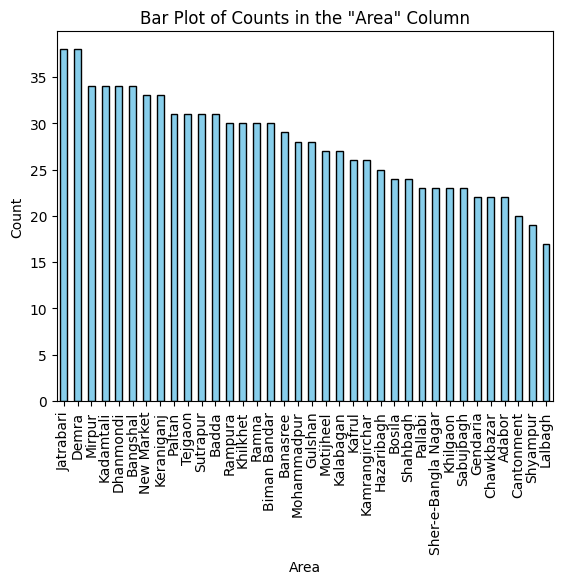

In [ ]:
area_counts = df['Area'].value_counts()

# Bar Plot
area_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Counts in the "Area" Column')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

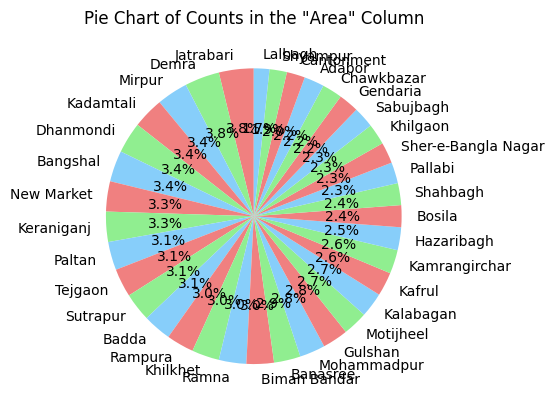

In [ ]:
# Pie Chart
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Pie Chart of Counts in the "Area" Column')
plt.show()

In [ ]:
areatype_counts = df['AreaType'].value_counts()
print("Count of each unique value in the 'AreaType' column:")
print(areatype_counts)

Count of each unique value in the 'AreaType' column:
AreaType
Developed      501
Undeveloped    499
Name: count, dtype: int64


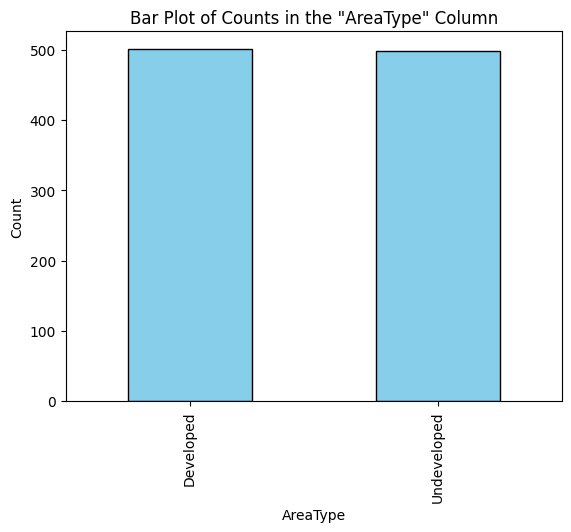

In [ ]:
# Bar Plot
areatype_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Counts in the "AreaType" Column')
plt.xlabel('AreaType')
plt.ylabel('Count')
plt.show()

In [ ]:
housetype_counts = df['HouseType'].value_counts()
print("Count of each unique value in the 'housetype' column:")
print(housetype_counts)

Count of each unique value in the 'housetype' column:
HouseType
Building    354
Other       329
Tinshed     317
Name: count, dtype: int64


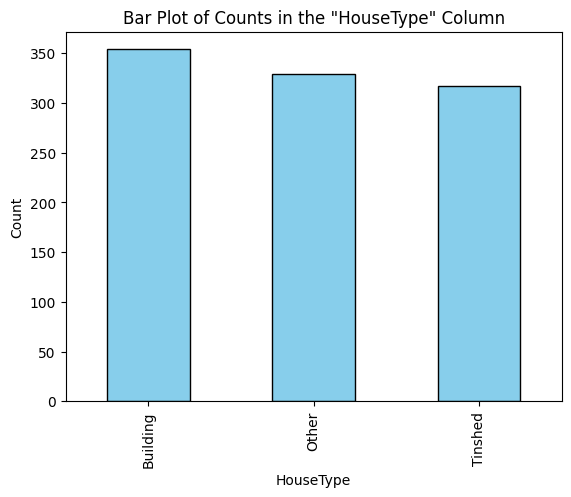

In [ ]:
# Bar Plot
housetype_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Counts in the "HouseType" Column')
plt.xlabel('HouseType')
plt.ylabel('Count')
plt.show()

In [ ]:
area_outcome_counts = df.groupby(['Area', 'Outcome']).size().unstack()
print("Count of Dengue Affected (1) and Not Affected (0) based on the 'Area' column:")
print(area_outcome_counts)

Count of Dengue Affected (1) and Not Affected (0) based on the 'Area' column:
Outcome               0   1
Area                       
Adabor                8  14
Badda                14  17
Banasree             19  10
Bangshal             10  24
Biman Bandar         18  12
Bosila               13  11
Cantonment            8  12
Chawkbazar           11  11
Demra                12  26
Dhanmondi            17  17
Gendaria             13   9
Gulshan              14  14
Hazaribagh           13  12
Jatrabari             7  31
Kadamtali            15  19
Kafrul                9  17
Kalabagan            12  15
Kamrangirchar        16  10
Keraniganj           19  14
Khilgaon              9  14
Khilkhet             14  16
Lalbagh               7  10
Mirpur               15  19
Mohammadpur           8  20
Motijheel            12  15
New Market           19  14
Pallabi               9  14
Paltan               17  14
Ramna                20  10
Rampura              16  14
Sabujbagh             8  1

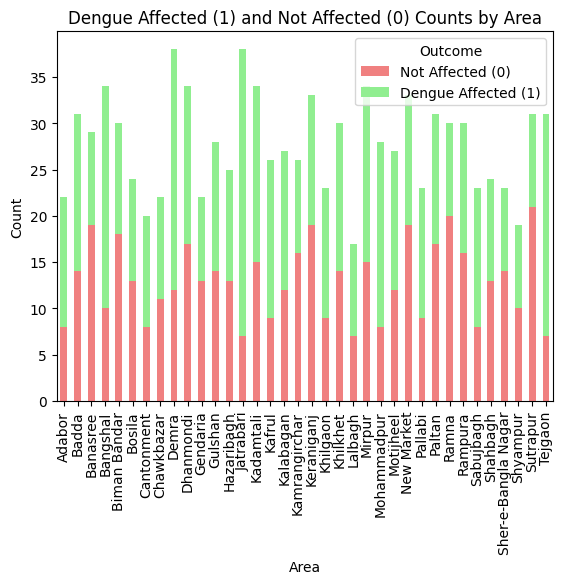

In [ ]:
area_outcome_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Dengue Affected (1) and Not Affected (0) Counts by Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Not Affected (0)', 'Dengue Affected (1)'], loc='upper right')
plt.show()

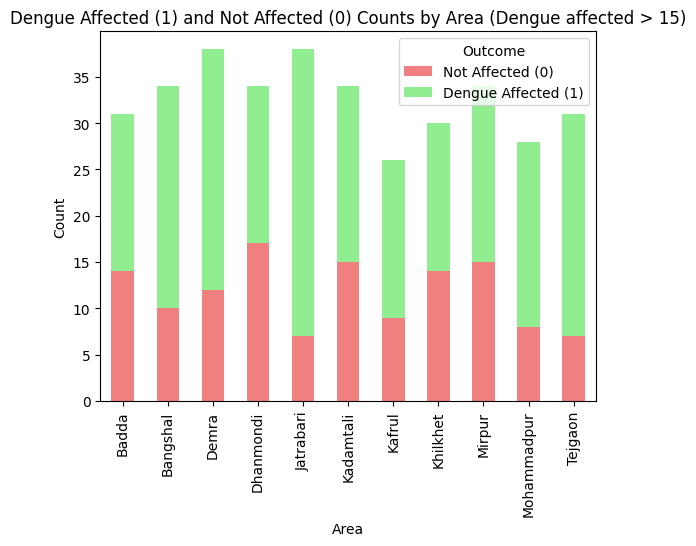

In [ ]:
area_outcome_counts_filtered = area_outcome_counts[area_outcome_counts[1] > 15]
area_outcome_counts_filtered.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])


plt.title('Dengue Affected (1) and Not Affected (0) Counts by Area (Dengue affected > 15)')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Not Affected (0)', 'Dengue Affected (1)'], loc='upper right')
plt.show()

In [ ]:
dengue_affected_df = df[df['Outcome'] == 1]
area_areaType_counts = dengue_affected_df.groupby(['Area', 'AreaType']).size().unstack()
print("Count of Dengue Affected (1) people by Area and AreaType:")
print(area_areaType_counts)

Count of Dengue Affected (1) people by Area and AreaType:
AreaType             Developed  Undeveloped
Area                                       
Adabor                       6            8
Badda                        8            9
Banasree                     6            4
Bangshal                    11           13
Biman Bandar                 8            4
Bosila                       6            5
Cantonment                   7            5
Chawkbazar                   6            5
Demra                       14           12
Dhanmondi                   10            7
Gendaria                     5            4
Gulshan                      7            7
Hazaribagh                   4            8
Jatrabari                   17           14
Kadamtali                    9           10
Kafrul                       4           13
Kalabagan                    4           11
Kamrangirchar                5            5
Keraniganj                   6            8
Khilgaon          

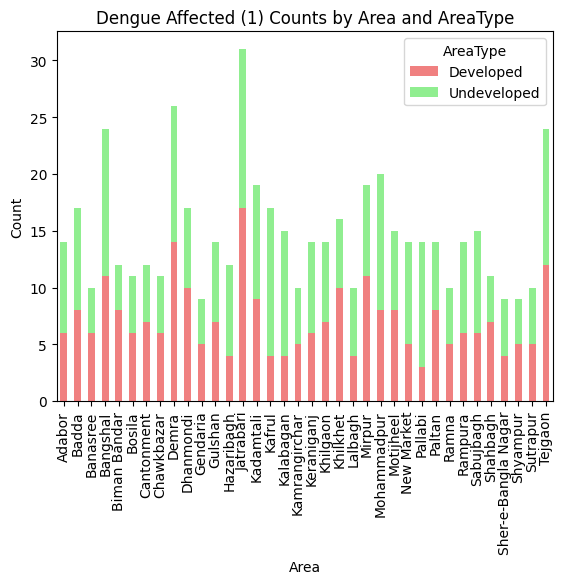

In [ ]:
area_areaType_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Dengue Affected (1) Counts by Area and AreaType')
plt.xlabel('Area')
plt.ylabel('Count')
plt.legend(title='AreaType', labels=['Developed', 'Undeveloped'], loc='upper right')
plt.show()

In [ ]:
df['Gender'] = df['Gender'].replace({'male': 1, 'female': 0})

In [ ]:
df.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [ ]:
df['Gender'] = df['Gender'].replace({'male': 1, 'Male': 1, 'female': 0, 'Female': 0})

<ipython-input-57-34cbbb328a01>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'male': 1, 'Male': 1, 'female': 0, 'Female': 0})


In [ ]:
df.head()

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,0,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,1,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,0,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,0,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,1,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0


In [ ]:
df_copy = df.copy()

# Use one-hot encoding for the specified columns
df_copy = pd.get_dummies(df_copy, columns=['Area', 'AreaType', 'District', 'HouseType'], prefix=['Area', 'AreaType', 'District', 'HouseType'])

# Convert boolean values to integers (1s and 0s)
df_copy = df_copy.astype(int)

# Print the updated DataFrame with one-hot encoding and 1s/0s
print("DataFrame with one-hot encoding (1s and 0s):")
print(df_copy)

DataFrame with one-hot encoding (1s and 0s):
     Gender  Age  NS1  IgG  IgM  Outcome  Area_Adabor  Area_Badda  \
0         0   45    0    0    0        0            0           0   
1         1   17    0    0    1        0            0           0   
2         0   29    0    0    0        0            0           0   
3         0   63    1    1    0        1            0           0   
4         1   22    0    0    0        0            0           0   
..      ...  ...  ...  ...  ...      ...          ...         ...   
995       0   16    1    1    0        1            0           0   
996       1   41    1    1    0        1            0           0   
997       1   45    0    0    1        0            0           0   
998       0   19    1    1    1        1            0           0   
999       0   28    0    0    1        0            1           0   

     Area_Banasree  Area_Bangshal  ...  Area_Sher-e-Bangla Nagar  \
0                0              0  ...                    

In [ ]:
df_copy.head()

,Gender,Age,NS1,IgG,IgM,Outcome,Area_Adabor,Area_Badda,Area_Banasree,Area_Bangshal,...,Area_Sher-e-Bangla Nagar,Area_Shyampur,Area_Sutrapur,Area_Tejgaon,AreaType_Developed,AreaType_Undeveloped,District_Dhaka,HouseType_Building,HouseType_Other,HouseType_Tinshed
0,0,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,1,17,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,0,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,0,63,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,1,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_result)

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# Insight analysis

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = '/content/drive/MyDrive/Dataset/dengue.csv'
data = pd.read_csv(file_path)

# Define age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Create a distribution plot
fig = px.histogram(data, x='AgeGroup', color='Gender', barmode='group', text_auto=True,
                   title='Positive and Negative cases of AGe and Genders',
                   labels={'AgeGroup': 'Age Group', 'Gender': 'Gender', 'count': 'Number of Cases'})
fig.update_layout(xaxis_title='Age Group of all positive and negative cases', yaxis_title='Number of positive and negative Cases', bargap=0.2)
fig.show()

# Generate textual explanation
def generate_explanation(df):
    explanation = ""
    total_cases = df.shape[0]
    explanation += f"Total dengue cases: {total_cases}\n\n"

    gender_distribution = df['Gender'].value_counts(normalize=True) * 100
    explanation += "Gender Distribution:\n"
    for gender, percentage in gender_distribution.items():
        explanation += f"- {gender}: {percentage:.2f}%\n"

    age_group_distribution = df['AgeGroup'].value_counts().sort_index()
    explanation += "\nAge Group Distribution:\n"
    for age_group, count in age_group_distribution.items():
        explanation += f"- {age_group}: {count} cases\n"

    return explanation
    # Print the textual explanation
explanation = generate_explanation(data)
print(explanation)

In [ ]:
print(data['AgeGroup'].unique())

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Define the bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

# Create the AgeGroup column
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Remove any rows with missing Outcome, Gender, or AgeGroup
data.dropna(subset=['Outcome', 'Gender', 'AgeGroup'], inplace=True)

# Custom color scales
gender_colors = {'Male': '#FF6B6B', 'Female': '#4ECDC4'}
age_colors = px.colors.qualitative.Set3

# Plot outcomes by gender
fig_gender = px.histogram(data, x='Outcome', color='Gender', barmode='group', text_auto=True,
                          title='Dengue Outcomes by Gender',
                          labels={'Outcome': 'Outcome', 'Gender': 'Gender', 'count': 'Number of Cases'},
                          category_orders={"Outcome": sorted(data['Outcome'].unique())},
                          color_discrete_map=gender_colors)

fig_gender.update_layout(xaxis_title='Outcome', yaxis_title='Number of Cases', bargap=0.2)

# Plot outcomes by age group
fig_age = px.histogram(data, x='Outcome', color='AgeGroup', barmode='group', text_auto=True,
                       title='Dengue Outcomes by Age Group',
                       labels={'Outcome': 'Outcome', 'AgeGroup': 'Age Group', 'count': 'Number of Cases'},
                       category_orders={"Outcome": sorted(data['Outcome'].unique()), "AgeGroup": labels},
                       color_discrete_sequence=age_colors)

fig_age.update_layout(xaxis_title='Outcome', yaxis_title='Number of Cases', bargap=0.2)

# Function to generate textual explanation
def generate_explanation(fig, data, group_column):
    outcomes = data['Outcome'].unique()
    groups = data[group_column].unique()

    total_cases = len(data)
    explanation = f"Analysis of {total_cases} Dengue cases:\n\n"

    for outcome in outcomes:
        outcome_data = data[data['Outcome'] == outcome]
        outcome_percent = (len(outcome_data) / total_cases) * 100
        explanation += f"{outcome} cases: {len(outcome_data)} ({outcome_percent:.1f}% of total)\n"

        for group in groups:
            group_outcome_data = outcome_data[outcome_data[group_column] == group]
            if len(group_outcome_data) > 0:
                group_outcome_percent = (len(group_outcome_data) / len(outcome_data)) * 100
                explanation += f"  - {group}: {len(group_outcome_data)} ({group_outcome_percent:.1f}% of {outcome} cases)\n"

        explanation += "\n"

    # Add actionable insights
    highest_outcome = data['Outcome'].value_counts().index[0]
    most_affected_group = data[data['Outcome'] == highest_outcome][group_column].value_counts().index[0]

    explanation += "Key Insights and Actions:\n"
    explanation += f"1. The most common outcome is '{highest_outcome}', with the {group_column} '{most_affected_group}' being most affected.\n"
    explanation += f"2. Focus prevention efforts on the {group_column} '{most_affected_group}' to potentially reduce '{highest_outcome}' cases.\n"
    explanation += "3. Investigate factors contributing to outcome differences across groups.\n"
    explanation += "4. Develop targeted awareness campaigns for high-risk groups.\n"
    explanation += "5. Allocate resources to support the most affected groups and improve overall outcomes.\n"

    return explanation

# Generate and display explanations
gender_explanation = generate_explanation(fig_gender, data, 'Gender')
age_explanation = generate_explanation(fig_age, data, 'AgeGroup')

# Display the plots and explanations
fig_gender.show()
print("\nExplanation for Dengue Outcomes by Gender:")
print(gender_explanation)

fig_age.show()
print("\nExplanation for Dengue Outcomes by Age Group:")
print(age_explanation)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from collections import Counter

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Dataset/dengue.csv')

# Filter the dataframe for Outcome = 1 and create a new DataFrame
df_outcome_1 = df[df['Outcome'] == 1].copy()

# Create age groups
df_outcome_1['AgeGroup'] = pd.cut(df_outcome_1['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# Count the occurrences of each age group
age_group_counts = Counter(df_outcome_1['AgeGroup'])

# Get the top 3 age groups
top_3_age_groups = dict(age_group_counts.most_common(3))

# Define colors for each age group
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Create a bar plot using Plotly
fig = go.Figure()

for i, (age_group, count) in enumerate(top_3_age_groups.items()):
    fig.add_trace(go.Bar(
        x=[age_group],
        y=[count],
        name=age_group,
        marker_color=colors[i]
    ))

fig.update_layout(
    title='Top 3 Age Groups with Positive Outcome',
    xaxis_title='Age Group',
    yaxis_title='Number of cases',
    barmode='group'
)

# Show the plot
fig.show()

# Generate actionable explanation
total_outcome_1 = len(df_outcome_1)
percentages = {k: v / total_outcome_1 * 100 for k, v in top_3_age_groups.items()}

explanation = f"""
Analysis of Top 3 Age Groups with Positive Dengue Outcome:

1. The age group {list(top_3_age_groups.keys())[0]} (shown in {colors[0]}) has the highest number of positive cases, accounting for {percentages[list(top_3_age_groups.keys())[0]]:.2f}% of all positive cases.
2. The second most affected age group is {list(top_3_age_groups.keys())[1]} (shown in {colors[1]}), representing {percentages[list(top_3_age_groups.keys())[1]]:.2f}% of positive cases.
3. The third most affected age group is {list(top_3_age_groups.keys())[2]} (shown in {colors[2]}), accounting for {percentages[list(top_3_age_groups.keys())[2]]:.2f}% of positive cases.

Actionable Insights:
1. Focus prevention efforts on the {list(top_3_age_groups.keys())[0]} age group, as they are most vulnerable to dengue.
2. Develop targeted awareness campaigns for the top two age groups: {list(top_3_age_groups.keys())[0]} and {list(top_3_age_groups.keys())[1]}.
3. Investigate factors contributing to higher infection rates in these age groups (e.g., lifestyle, exposure, or biological factors).
4. Allocate more resources for early detection and treatment in healthcare facilities serving these age groups.
5. Consider age-specific interventions to reduce dengue transmission in these high-risk groups.
"""

print(explanation)


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
file_path = '/content/drive/MyDrive/Dataset/dengue.csv'
data = pd.read_csv(file_path)

# Ensure 'Outcome' is binary (0 = No Dengue, 1 = Dengue)
data['Outcome'] = data['Outcome'].map({0: 'No Dengue', 1: 'Dengue'})

# Calculate dengue incidence by area
area_incidence = data.groupby('Area')['Outcome'].value_counts(normalize=True).unstack()
area_incidence['Dengue_Rate'] = area_incidence['Dengue'] * 100
area_incidence = area_incidence.sort_values('Dengue_Rate', ascending=False)

# Create a bar plot of dengue incidence by area
fig = px.bar(area_incidence,
             x=area_incidence.index,
             y='Dengue_Rate',
             title='Dengue Incidence by Area',
             labels={'x': 'Area', 'y': 'Dengue Incidence Rate (%)'},
             color='Dengue_Rate',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Area', yaxis_title='Dengue Incidence Rate (%)')

# Function to generate textual explanation
def generate_explanation(area_incidence, data):
    highest_incidence_area = area_incidence.index[0]
    highest_incidence_rate = area_incidence['Dengue_Rate'].max()
    lowest_incidence_area = area_incidence.index[-1]
    lowest_incidence_rate = area_incidence['Dengue_Rate'].min()

    total_cases = len(data)
    dengue_cases = len(data[data['Outcome'] == 'Dengue'])
    overall_incidence_rate = (dengue_cases / total_cases) * 100

    # Additional insights
    high_risk_areas = area_incidence[area_incidence['Dengue_Rate'] > overall_incidence_rate].index.tolist()
    most_common_house_type = data[data['Area'] == highest_incidence_area]['HouseType'].mode().values[0]
    area_type = data[data['Area'] == highest_incidence_area]['AreaType'].mode().values[0]

    explanation = f"Analysis of Dengue Incidence by Area:\n\n"
    explanation += f"1. The area with the highest incidence of dengue cases is '{highest_incidence_area}' with a rate of {highest_incidence_rate:.2f}%.\n"
    explanation += f"2. The area with the lowest incidence is '{lowest_incidence_area}' with a rate of {lowest_incidence_rate:.2f}%.\n"
    explanation += f"3. The overall dengue incidence rate across all areas is {overall_incidence_rate:.2f}%.\n"
    explanation += f"4. There are {len(high_risk_areas)} areas with above-average dengue incidence rates.\n"
    explanation += f"5. In the highest incidence area ('{highest_incidence_area}'):\n"
    explanation += f"   - The most common house type is '{most_common_house_type}'.\n"
    explanation += f"   - The area type is '{area_type}'.\n\n"

    explanation += "Actionable Insights:\n"
    explanation += f"1. Prioritize dengue prevention and control measures in '{highest_incidence_area}' and other high-risk areas.\n"
    explanation += f"2. Investigate environmental and social factors in '{highest_incidence_area}' that might contribute to high dengue incidence.\n"
    explanation += f"3. Focus on '{most_common_house_type}' houses in high-risk areas for targeted interventions (e.g., mosquito breeding site elimination).\n"
    explanation += f"4. Develop area-specific strategies considering the '{area_type}' characteristics of high-incidence areas.\n"
    explanation += f"5. Study low-incidence areas like '{lowest_incidence_area}' to identify protective factors that could be applied elsewhere.\n"
    explanation += "6. Implement community education programs in high-risk areas to raise awareness about dengue prevention.\n"
    explanation += "7. Collaborate with local health authorities to enhance surveillance and rapid response in high-incidence areas.\n"
    explanation += "8. Consider seasonal patterns and climate factors that might influence dengue transmission in different areas.\n"

    return explanation

# Generate and display explanation
explanation = generate_explanation(area_incidence, data)

# Display the plot and explanation
fig.show()
print("\nExplanation and Actionable Insights:")
print(explanation)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency

# Load the dataset
file_path = '/content/drive/MyDrive/Dataset/dengue.csv'
data = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(data['AreaType'], data['Outcome'])

# Calculate percentages
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Create a stacked bar figure
fig_stacked = go.Figure()

# Prepare data for stacked bar chart
area_types = contingency_table.index
no_dengue = contingency_table[0].values
dengue = contingency_table[1].values

# Create stacked bar traces
fig_stacked.add_trace(go.Bar(x=area_types, y=no_dengue, name='No Dengue'))
fig_stacked.add_trace(go.Bar(x=area_types, y=dengue, name='Dengue'))

# Update layout of stacked bar chart
fig_stacked.update_layout(
    xaxis_title='Type of Area',
    yaxis_title='Number of Cases',
    barmode='stack'  # Stack bars
)

# Create a heatmap
fig_heatmap = px.imshow(percentage_table, text_auto=True, aspect="auto",
                        title='Heatmap of Dengue Cases by Area Type',
                        labels=dict(x="Outcome", y="Type of Area", color="Percentage"),
                        x=['No Dengue', 'Dengue'],
                        color_continuous_scale='viridis')  # Changed from 'ViridisR' to 'viridis'

fig_heatmap.update_layout(xaxis_title='Outcome', yaxis_title='Type of Area')

# Function to generate textual explanation
def generate_explanation(contingency_table, percentage_table, chi2, p_value):
    total_cases = contingency_table.sum().sum()
    dengue_cases = contingency_table[1].sum()
    overall_dengue_rate = (dengue_cases / total_cases) * 100

    highest_rate_area = percentage_table[1].idxmax()
    highest_rate = percentage_table.loc[highest_rate_area, 1]

    lowest_rate_area = percentage_table[1].idxmin()
    lowest_rate = percentage_table.loc[lowest_rate_area, 1]

    explanation = f"Analysis of Dengue Cases by Area Type:\n\n"
    explanation += f"1. Overall dengue incidence rate: {overall_dengue_rate:.2f}%\n"
    explanation += f"2. Area type with highest dengue rate: '{highest_rate_area}' ({highest_rate:.2f}%)\n"
    explanation += f"3. Area type with lowest dengue rate: '{lowest_rate_area}' ({lowest_rate:.2f}%)\n"
    explanation += f"4. Chi-square test statistic: {chi2:.2f}\n"
    explanation += f"5. P-value: {p_value:.4f}\n\n"

    if p_value < 0.05:
        explanation += "The Chi-square test indicates a significant correlation between area type and dengue incidence (p < 0.05).\n\n"
    else:
        explanation += "The Chi-square test does not show a significant correlation between area type and dengue incidence (p >= 0.05).\n\n"

    explanation += "Actionable Insights:\n"
    explanation += f"1. Prioritize dengue prevention efforts in '{highest_rate_area}' areas, which have the highest incidence rate.\n"
    explanation += f"2. Investigate environmental and social factors in '{highest_rate_area}' areas that might contribute to higher dengue rates.\n"
    explanation += f"3. Study protective factors in '{lowest_rate_area}' areas to identify strategies that could be applied to high-risk areas.\n"
    explanation += "4. Develop targeted intervention programs for each area type, considering their specific characteristics and risk factors.\n"
    explanation += "5. Enhance mosquito control measures in high-risk area types, focusing on breeding site elimination and community education.\n"
    explanation += "6. Implement early warning systems in high-risk areas to enable rapid response to potential outbreaks.\n"
    explanation += "7. Collaborate with urban planners and local authorities to address environmental risk factors in different area types.\n"
    explanation += "8. Conduct further research to understand the specific factors within each area type that influence dengue transmission.\n"

    return explanation

# Generate and display explanation
explanation = generate_explanation(contingency_table, percentage_table, chi2, p_value)

# Display the plots and explanation
fig_stacked.show()
fig_heatmap.show()
print("\nExplanation and Actionable Insights:")
print(explanation)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency

# Load the dataset
file_path = '/content/drive/MyDrive/Dataset/dengue.csv'
data = pd.read_csv(file_path)

# Ensure 'Outcome' is binary (0 = No Dengue, 1 = Dengue)
data['Outcome'] = data['Outcome'].map({0: 'No Dengue', 1: 'Dengue'})

# Create a contingency table
contingency_table = pd.crosstab(data['HouseType'], data['Outcome'])

# Calculate percentages
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Create a stacked bar chart
fig_stacked = px.bar(percentage_table, x=percentage_table.index, y=['No Dengue', 'Dengue'],
                     title='Dengue Incidence by House Type',
                     labels={'value': 'Percentage', 'variable': 'Outcome', 'HouseType': 'Type of House'},
                     color_discrete_map={'No Dengue': '#66c2a5', 'Dengue': '#fc8d62'},
                     height=500)

fig_stacked.update_layout(xaxis_title='Type of House', yaxis_title='Percentage')

# Create a heatmap
fig_heatmap = px.imshow(percentage_table, text_auto=True, aspect="auto",
                        title='Heatmap of Dengue Incidence by House Type',
                        labels=dict(x="Outcome", y="Type of House", color="Percentage"),
                        color_continuous_scale='viridis')

fig_heatmap.update_layout(xaxis_title='Outcome', yaxis_title='Type of House')

# Function to generate textual explanation
def generate_explanation(contingency_table, percentage_table, chi2, p_value):
    total_cases = contingency_table.sum().sum()
    dengue_cases = contingency_table['Dengue'].sum()
    overall_dengue_rate = (dengue_cases / total_cases) * 100

    highest_rate_house = percentage_table['Dengue'].idxmax()
    highest_rate = percentage_table.loc[highest_rate_house, 'Dengue']

    lowest_rate_house = percentage_table['Dengue'].idxmin()
    lowest_rate = percentage_table.loc[lowest_rate_house, 'Dengue']

    explanation = f"Analysis of Dengue Incidence by House Type:\n\n"
    explanation += f"1. Overall dengue incidence rate: {overall_dengue_rate:.2f}%\n"
    explanation += f"2. House type with highest dengue rate: '{highest_rate_house}' ({highest_rate:.2f}%)\n"
    explanation += f"3. House type with lowest dengue rate: '{lowest_rate_house}' ({lowest_rate:.2f}%)\n"
    explanation += f"4. Chi-square test statistic: {chi2:.2f}\n"
    explanation += f"5. P-value: {p_value:.4f}\n\n"

    if p_value < 0.05:
        explanation += "The Chi-square test indicates a significant correlation between house type and dengue incidence (p < 0.05).\n\n"
    else:
        explanation += "The Chi-square test does not show a significant correlation between house type and dengue incidence (p >= 0.05).\n\n"

    explanation += "Actionable Insights:\n"
    explanation += f"1. Focus dengue prevention efforts on '{highest_rate_house}' houses, which have the highest incidence rate.\n"
    explanation += f"2. Investigate specific factors in '{highest_rate_house}' houses that might contribute to higher dengue rates, such as water storage practices or building materials.\n"
    explanation += f"3. Study protective factors in '{lowest_rate_house}' houses to identify strategies that could be applied to high-risk house types.\n"
    explanation += "4. Develop targeted intervention programs for each house type, considering their specific characteristics and risk factors.\n"
    explanation += "5. Enhance mosquito control measures in high-risk house types, focusing on potential breeding sites specific to these structures.\n"
    explanation += "6. Implement community education programs tailored to different house types, emphasizing prevention strategies most relevant to each.\n"
    explanation += "7. Collaborate with housing authorities and urban planners to address structural factors that might increase dengue risk in certain house types.\n"
    explanation += "8. Consider socio-economic factors associated with different house types that might influence dengue transmission and tailor interventions accordingly.\n"

    return explanation

# Generate and display explanation
explanation = generate_explanation(contingency_table, percentage_table, chi2, p_value)

# Display the plots and explanation
fig_stacked.show()
fig_heatmap.show()
print("\nExplanation and Actionable Insights:")
print(explanation)


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/dengue.csv')

# Calculate percentages of positive cases for NS1, IgG, and IgM
markers = ['NS1', 'IgG', 'IgM']
percentages = {marker: (df[marker].sum() / len(df)) * 100 for marker in markers}

# Create a bar plot for percentages
fig_percentages = go.Figure(data=[
    go.Bar(x=list(percentages.keys()), y=list(percentages.values()),
           marker_color=['#FF9999', '#66B2FF', '#99FF99'])
])
fig_percentages.update_layout(
    title='Percentage of Positive Cases for NS1, IgG, and IgM',
    xaxis_title='Marker',
    yaxis_title='Percentage (%)',
    yaxis_range=[0, 100]
)

# Calculate correlation between markers and outcome
correlations = {marker: stats.pointbiserialr(df[marker], df['Outcome'])[0] for marker in markers}

# Create a bar plot for correlations
fig_correlations = go.Figure(data=[
    go.Bar(x=list(correlations.keys()), y=list(correlations.values()),
           marker_color=['#FF9999', '#66B2FF', '#99FF99'])
])
fig_correlations.update_layout(
    title='Correlation between Markers and Disease Outcome',
    xaxis_title='Marker',
    yaxis_title='Correlation Coefficient',
    yaxis_range=[-1, 1]
)

# Create a subplot with both figures
fig = make_subplots(rows=2, cols=1, subplot_titles=('Percentage of Positive Cases', 'Correlation with Disease Outcome'))
for trace in fig_percentages.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_correlations.data:
    fig.add_trace(trace, row=2, col=1)
fig.update_layout(height=800, title_text="Analysis of Dengue Markers")

# Show the plot
fig.show()

# Generate textual explanation
def interpret_correlation(value):
    if abs(value) < 0.3:
        return "weak"
    elif abs(value) < 0.5:
        return "moderate"
    else:
        return "strong"

explanation = f"""
Analysis of Dengue Markers:

1. Percentage of Positive Cases:
   - NS1: {percentages['NS1']:.2f}%
   - IgG: {percentages['IgG']:.2f}%
   - IgM: {percentages['IgM']:.2f}%

2. Correlation with Disease Outcome:
   - NS1: {correlations['NS1']:.3f} ({interpret_correlation(correlations['NS1'])})
   - IgG: {correlations['IgG']:.3f} ({interpret_correlation(correlations['IgG'])})
   - IgM: {correlations['IgM']:.3f} ({interpret_correlation(correlations['IgM'])})

Interpretation:
1. {markers[np.argmax(list(percentages.values()))]} has the highest percentage of positive cases ({max(percentages.values()):.2f}%),
   while {markers[np.argmin(list(percentages.values()))]} has the lowest ({min(percentages.values()):.2f}%).
2. {markers[np.argmax(np.abs(list(correlations.values())))]} shows the strongest correlation with the disease outcome
   ({correlations[markers[np.argmax(np.abs(list(correlations.values())))]]:.3f}), indicating it may be the most reliable
   predictor of the disease's severity or progression.
3. {markers[np.argmin(np.abs(list(correlations.values())))]} has the weakest correlation with the outcome
   ({correlations[markers[np.argmin(np.abs(list(correlations.values())))]]:.3f}), suggesting it might be less useful
   for predicting the disease's outcome.

Actionable Insights:
1. Focus on {markers[np.argmax(np.abs(list(correlations.values())))]} testing for early detection and prognosis,
   as it shows the strongest correlation with the disease outcome.
2. Consider using a combination of markers for more accurate diagnosis and prognosis,
   as each marker provides different information about the disease state.
3. Investigate why {markers[np.argmin(list(percentages.values()))]} has a lower positive rate and whether this
   affects its diagnostic value in different stages of the disease.
4. Develop targeted interventions based on the presence of specific markers,
   especially {markers[np.argmax(np.abs(list(correlations.values())))]}, to improve patient outcomes.
"""

print(explanation)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/dengue.csv')

# Define markers
markers = ['NS1', 'IgG', 'IgM']

# Create a function to calculate odds ratio
def odds_ratio(marker, outcome):
    contingency_table = pd.crosstab(df[marker], df[outcome])
    odds_ratio, p_value = stats.fisher_exact(contingency_table)
    return odds_ratio, p_value

# Calculate odds ratios for each marker
odds_ratios = {marker: odds_ratio(marker, 'Outcome') for marker in markers}

# Create subplots
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Odds Ratios for Severe Outcome', 'p-values'),
                    specs=[[{"type": "bar"}, {"type": "bar"}]])
# Add odds ratio bars
fig.add_trace(
    go.Bar(x=markers, y=[or_value[0] for or_value in odds_ratios.values()],
           name='Odds Ratio', marker_color=['#FF9999', '#66B2FF', '#99FF99']),
    row=1, col=1
)

# Add p-value bars
fig.add_trace(
    go.Bar(x=markers, y=[or_value[1] for or_value in odds_ratios.values()],
           name='p-value', marker_color=['#FF9999', '#66B2FF', '#99FF99']),
    row=1, col=2
)

# Update layout
fig.update_layout(height=500, width=1000, title_text="Prediction of Dengue Severity by Markers")
fig.update_yaxes(title_text="Odds Ratio", row=1, col=1)
fig.update_yaxes(title_text="p-value", row=1, col=2)

# Show the plot
fig.show()

# Generate textual explanation
def interpret_odds_ratio(or_value):
    if or_value > 1:
        return "increased"
    elif or_value < 1:
        return "decreased"
    else:
        return "unchanged"

def interpret_p_value(p_value):
    if p_value < 0.001:
        return "highly significant"
    elif p_value < 0.05:
        return "significant"
    else:
        return "not significant"

explanation = """
Analysis of Dengue Markers and Disease Severity:

1. Odds Ratios and Statistical Significance:
"""
for marker in markers:
    or_value, p_value = odds_ratios[marker]
    explanation += f"""
   - {marker}:
     Odds Ratio: {or_value:.2f} (95% CI: {max(0, or_value - 1.96*np.sqrt(or_value)):.2f} - {or_value + 1.96*np.sqrt(or_value):.2f})
     p-value: {p_value:.4f} ({interpret_p_value(p_value)})
     Interpretation: The presence of {marker} is associated with {interpret_odds_ratio(or_value)} odds of severe dengue outcome.
     This association is {interpret_p_value(p_value)}.
"""

most_predictive = max(odds_ratios, key=lambda k: odds_ratios[k][0])
least_predictive = min(odds_ratios, key=lambda k: odds_ratios[k][0])

explanation += f"""
2. Key Findings:
   - {most_predictive} appears to be the strongest predictor of severe dengue outcome, with an odds ratio of {odds_ratios[most_predictive][0]:.2f}.
   - {least_predictive} shows the weakest association with severe outcomes, with an odds ratio of {odds_ratios[least_predictive][0]:.2f}.

3. Actionable Insights:
   a. Prioritize {most_predictive} testing for early identification of potentially severe cases.
   b. Develop treatment protocols that consider the presence of {most_predictive} as a risk factor for severe outcomes.
   c. Use a combination of markers for a more comprehensive risk assessment, as each marker provides different predictive value.
   d. Consider more intensive monitoring and earlier intervention for patients testing positive for {most_predictive}.
   e. Conduct further research to understand why {least_predictive} has a weaker association with severe outcomes and its role in disease progression.

4. Limitations:
   - This analysis does not account for potential confounding factors such as age, gender, or comorbidities.
   - The temporal relationship between marker presence and disease outcome is not captured in this analysis.
   - The specific definition of 'severe outcome' used in this dataset should be considered when interpreting these results.

5. Next Steps:
   - Validate these findings with larger, diverse datasets.
   - Investigate the combined predictive power of multiple markers.
   - Explore the relationship between marker levels (not just presence/absence) and disease severity.
   - Develop and validate a predictive model incorporating these markers along with other clinical and demographic factors.
"""

print(explanation)